In [6]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Снял с помощью фотокамеры пучок в двух местах. ниже словарь расстояние до входа УЛЕ резонатора, (ширина, высота)

In [8]:
beam_laser = {20:(0.97,1.12,1.05),
              47:(0.82,0.97,0.9)}

In [4]:
27 / 415 * 25.4 /2

0.8262650602409638

### Проснял зависимость длины волны моды резонатора от температуры. Данные находятся в файле [freq_vs_temp_ULE410.csv](./freq_vs_temp_ULE410.csv)

In [76]:
data = pd.read_csv('freq_vs_temp_ULE410.csv')
lambda_cooling = 821.17269

params [    2549.1949912  -2093299.52975419]
Temperature for desired $\lambda$=821.172690 is 29.778503


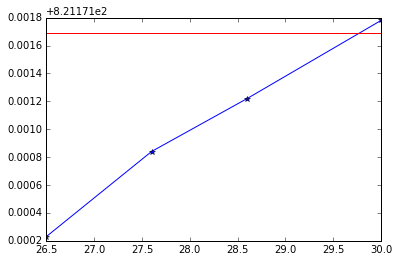

In [75]:
plot(data['T'], data['lambda'],'*-')
axhline(lambda_cooling,color='r')
xx, yy = data['lambda'], data['T']
params = polyfit(xx[1:],yy[1:],1)
print('params',params)
print("Temperature for desired $\lambda$=%f is %f"
      %(lambda_cooling,params[0]*lambda_cooling + params[1]) )

In [84]:
p2  =polyfit(data['T'],data['f'],1)
print('Sensetivity to temperature is %.0f MHz/degree' % (p2[0]*1e6) )

Sensetivity to temperature is -194 MHz/degree


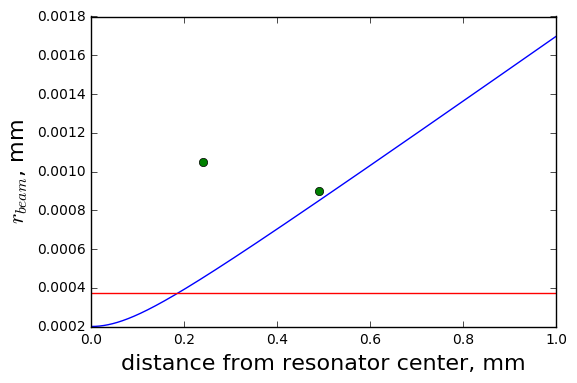

In [14]:
# Here all the initialisatoins and functions declare
λ = 1.06e-6
L = 78e-3
R = 400e-3
w0 = sqrt(λ*(L/2)/pi * (R/(L/2) - 1)**0.5)
c = 3e8 # mm/s
z_r = pi*w0**2/λ
def r_front(z):
    return z*(1 + (pi*w0**2/(λ*z))**2)
def w(z):
    return w0*sqrt(1 + (λ*z/(pi*w0**2))**2)
def ν_mnq(m,n,q):
    return c/(2*L) * (q + 1/pi * (m+n+1)*arccos(1-L/R))

zz = linspace(0,1,1000)
r_beam = 0.372e-3 # mm для объектива C330TME-A - f = 3.1 mm и волокна с NA=0.12
plot(zz, w(zz))
axhline(y=r_beam,c='r')
ylabel('$r_{beam}$, mm',fontsize=16)
xlabel('distance from resonator center, mm',fontsize=16)
plot(array((40+200,40+450))*1e-3,array((1.05,0.9))*1e-3,'o')

In [9]:
def apply_m_to_q(m,q):
    return (m[0,0]*q + m[0,1]) / (m[1,0]*q + m[1,1])
def m_l(l):
    return array([[1,l],[0,1]])
def m_f(f):
    return array([[1,0],[-1/f,1]])
def get_w(q):
    return sqrt(λ / (pi * imag(-1/q)))
def get_w0(q):
    return sqrt(λ / pi * imag(q))

In [13]:
q0 = 1j*z_r
q1 = apply_m_to_q(dot(m_f(-R),m_l(L/2)),q0)

In [15]:
xs = L/2 + linspace(0,1,100)
qs = [apply_m_to_q(m_l(x), q1) for x in xs]
ws = [get_w(q) for q in qs]

In [18]:
q1

(0.063209076175040513+0.10865947603802463j)

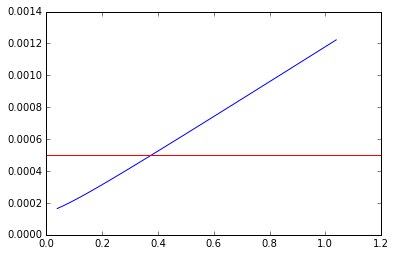

In [17]:
plot(xs,ws)
r_beam = 0.5e-3 # m для той системы, что там стоит, после АОМа
axhline(y=r_beam,c='r')

### Расчеты по зависимости показателя преломления от давления и температуры
<img  src="all_refracrive.png"/>

Refrectivity vs pressure (from around 1000 mb):

    {{68/250e06}} /mbar
For stabilization with accuracy 1MHz at optical frequency $10^{15}$MHz we need to stabilize pressure with accuracy

    {{'%.1e'%(1e-9 / (68/250e06))}} /mbar

То есть сразу лучше качать до высокого вакуума и подстраивать АОМами

### Возможность смещения линии резонатора

<img  src="ULE_stab.png", width=600/>

Как видно, изменение частоты лазера с температурой можно аппроксимировать параболической зависимостью 

\begin{equation}
    \delta f = \frac13 \Delta T, [MHz]
\end{equation}

При доступном диапазоне сканирования температуры $20^\circ$C максимальное перестраивание частоты моды составит 130 кГц 

### Параметры резонатора
Измерил пропускание зеркала -  3 мкВт из 5.3 мВт. Отсюда получается коэффициент пропускания 1-R = {{3/5e+3}}

\begin{equation}
F = \frac{\pi \sqrt{R}}{1-R}
\end{equation}

and equals to {{'%.0f' % (3.14/(3/5e+3))}}

#### Радиусы кривизны и параметры пучка
<img  src="iu129qgl.bmp"/> 
<img  src="jpenobbr.bmp"/>

При радиусе зеркал 500 мм и размере резонатора 78 мм перетяжка в центре резонатора получается равной {{w0}} мм.

Преломление на стекле зеркала почти не меняет положение фокуса.

На рисунке ниже приведены кривые зависимости радиуса пучка от расстояния от ЦЕНТРА резонатора и для графического вычисления построена горизонтальная прямая, соответствующая радиусу почка до согласовывающей линзы. Координата пересечения и есть фокусное расстояние линзы.

Для объектива C330TME-A - f = 3.1 mm и волокна с NA=0.12 пулчаем радиус пятна на объективе 0.372мм и находим, что расстояние от него до перетяжки должно быть 350 мм

#### Измерения финесс резонатора

В файлах 22-25 .csv записаны линии пропускания резонатора. Большие пики - TEM00 мода, через один - TEM01. Обработка этих файлов находится в [transmission_piaks.ipynb](./transmission_picks.ipynb)
Из файла 23.csv находим отношение расстояния между TEM00 и TEM01 
-                  75, 73.5
-    из файла 22: 71 74 75 80 68
-    из файла 25: 64 60
-    из файла 24: 79 70 69.

Усреднив, получаем 75. Отношение ФСР к расстоянию между TEM00 и TEM01 можно найти по формуле (н.р. из Риле):

\begin{equation}
\nu_{m,n,q} = \frac{c}{2L}(q + ( m + n + 1) * arccos(\sqrt{1-L/R_1}\sqrt{1-L/R_1})
\end{equation}

находим, что отношение ширины задетектированной линии TEM00 к ФСР составляет 1 / {{'%.0f' % (75*(ν_mnq(0,0,101)-ν_mnq(0,0,100))/(ν_mnq(0,1,100)-ν_mnq(0,0,100)))}}.
Так как линии пропускания хорошо фитовались гакссом, а не  лоренцом, то скорее всего это связано с шириной линии лазера. 
Даже если это наш настоящий финесс, это нас вполне устраивает.
